In [1]:
from fenics import *
import sys
sys.path.append('../data/')
sys.path.append('../graphnics/')
sys.path.append('../applications/')
sys.path.append('../../NetworkGen/')
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import imp

import graph_utils as gu
from graph_examples import *
import infsup_eigvals as infsup
import models
from slepc4py import SLEPc
from graph_example_tree import *

RT = {'flux_space': 'CG', 'flux_degree': 1, 'pressure_space': 'DG', 'pressure_degree': 0}
TH = {'flux_space': 'CG', 'flux_degree': 2, 'pressure_space': 'CG', 'pressure_degree': 1}

Missing HsMG for fract norm computing


In [9]:
imp.reload(infsup)
imp.reload(models)

print('Line graph with N refinements')

for model_func, model_name in [[infsup.HydraulicNetwork_EP, 'Hydraulic Newtork'], [infsup.NetworkStokes_EP, 'Network Stokes']]:

    print('Model: ', model_name)
        
    print(f'$h_min$     & $\lambda_{TH}$ & $\lambda_{RT}$ \\\\ \hline')
    for N in [2, 3, 4, 5, 6, 7, 8]:
        G = make_line_graph(2)
        G.make_mesh(N)

        prop_dict = {key: { 'Res':Constant(1),'Ainv':Constant(1)} for key in list(G.edges.keys())}
        nx.set_edge_attributes(G, prop_dict)

        model = model_func(G, space=TH)
        eigvals_RT, u_lams = infsup.solve_infsup_eigproblem(model)

        model = model_func(G, space=RT)
        eigvals_TH, u_lams = infsup.solve_infsup_eigproblem(model)

        print(f'{G.global_mesh.hmin():1.2e}     & {np.min(np.abs(eigvals_RT)):1.2e}  & {np.min(np.abs(eigvals_TH)):1.2e}\\\\' )
        
    print()

Line graph with N refinements
Model:  Hydraulic Newtork
$h_min$     & $\lambda_{'flux_space': 'CG', 'flux_degree': 2, 'pressure_space': 'CG', 'pressure_degree': 1}$ & $\lambda_{'flux_space': 'CG', 'flux_degree': 1, 'pressure_space': 'DG', 'pressure_degree': 0}$ \\ \hline
2.50e-01     & 1.27e-03  & 2.59e-03\\
1.25e-01     & 2.74e-04  & 6.50e-04\\
6.25e-02     & 6.59e-05  & 3.80e-04\\
3.12e-02     & 1.63e-05  & 4.68e-04\\
1.56e-02     & 4.07e-06  & 4.96e-04\\
7.81e-03     & 1.02e-06  & 5.04e-04\\
3.91e-03     & 2.54e-07  & 5.05e-04\\

Model:  Network Stokes
$h_min$     & $\lambda_{'flux_space': 'CG', 'flux_degree': 2, 'pressure_space': 'CG', 'pressure_degree': 1}$ & $\lambda_{'flux_space': 'CG', 'flux_degree': 1, 'pressure_space': 'DG', 'pressure_degree': 0}$ \\ \hline
2.50e-01     & 5.00e-01  & 5.00e-01\\
1.25e-01     & 5.00e-01  & 5.00e-01\\
6.25e-02     & 5.00e-01  & 5.00e-01\\
3.12e-02     & 5.00e-01  & 5.00e-01\\
1.56e-02     & 5.00e-01  & 5.00e-01\\
7.81e-03     & 5.00e-01  & 5.00e

In [9]:
imp.reload(infsup)
imp.reload(models)

print('Line graph with N bifurcation points')

for model_func, model_name, disc in [[infsup.HydraulicNetwork_EP, 'Hydraulic Newtork', RT], 
                               [infsup.NetworkStokes_EP, 'Network Stokes', RT]]:

    print('Model: ', model_name)
        
    print(f'n_bifs    hmin          lambda')
    for N in [2, 3, 4, 5, 6, 7, 8]:
        G = make_line_graph(N)
        G.make_mesh(4)

        prop_dict = {key: { 'Res':Constant(1),'Ainv':Constant(1)} for key in list(G.edges.keys())}
        nx.set_edge_attributes(G, prop_dict)

        model = model_func(G, space=disc)

        eigvals, u_lams = infsup.infsup_eigproblem(model)

        print(f'{G.num_bifurcations}         {G.global_mesh.hmin():1.2e}      {np.min(np.abs(eigvals)):1.2e}')
    print()

Line graph with N bifurcation points
Model:  Hydraulic Newtork
n_bifs    hmin          lambda
0         6.25e-02      3.80e-04
1         6.25e-02      1.86e-03
2         6.25e-02      5.41e-03
3         6.25e-02      8.12e-03
4         6.25e-02      1.41e-02
5         6.25e-02      1.53e-02
6         6.25e-02      3.18e-02

Model:  Network Stokes
n_bifs    hmin          lambda
0         6.25e-02      5.00e-01
1         6.25e-02      5.00e-01
2         6.25e-02      3.14e-01
3         6.25e-02      1.56e-01
4         6.25e-02      8.49e-02
5         6.25e-02      5.01e-02
6         6.25e-02      3.16e-02



In [8]:
imp.reload(infsup)
imp.reload(models)

print('Trees')



for model_func, model_name, disc in [[infsup.HydraulicNetwork_EP, 'Hydraulic Newtork', RT], 
                               [infsup.NetworkStokes_EP, 'Network Stokes', RT]]:

    print('Model: ', model_name)
    
    Gs = []
    
    for n in [1, 2, 3, 4]:
    
        graph = make_arterial_tree(n, uniform_lengths=True)
        G = copy_from_nx_graph(graph)
        G.make_mesh(1)
        
        row =f'{G.num_bifurcations}  '
        
        for N in [3, 4, 5, 6]:

            G.make_mesh(N)
            prop_dict = {key: { 'Res':Constant(1),'Ainv':Constant(1)} for key in list(G.edges.keys())}
            nx.set_edge_attributes(G, prop_dict)

            model = model_func(G, space=disc)
            eigvals, u_lams = infsup.solve_infsup_eigproblem(model)

            row += f'({G.global_mesh.hmin():1.1e}) {np.min(np.abs(eigvals)):1.2e}  &   '
        print(row)
        Gs.append(G)
    print()
    
    

Trees
Model:  Hydraulic Newtork
0  (1.0e+00) 3.85e-02  &   (5.0e-01) 2.32e-02  &   (2.5e-01) 2.83e-02  &   (1.2e-01) 2.99e-02  &   
1  (1.0e+00) 2.20e-02  &   (5.0e-01) 2.20e-02  &   (2.5e-01) 2.20e-02  &   (1.2e-01) 2.20e-02  &   
3  (1.0e+00) 4.26e-03  &   (5.0e-01) 4.26e-03  &   (2.5e-01) 4.26e-03  &   (1.2e-01) 4.26e-03  &   
7  (1.0e+00) 1.14e-03  &   (5.0e-01) 1.14e-03  &   (2.5e-01) 1.14e-03  &   (1.2e-01) 1.14e-03  &   

Model:  Network Stokes
0  (1.0e+00) 1.61e-01  &   (5.0e-01) 1.59e-01  &   (2.5e-01) 1.59e-01  &   (1.2e-01) 1.59e-01  &   
1  (1.0e+00) 2.18e-02  &   (5.0e-01) 2.18e-02  &   (2.5e-01) 2.18e-02  &   (1.2e-01) 2.18e-02  &   
3  (1.0e+00) 4.26e-03  &   (5.0e-01) 4.26e-03  &   (2.5e-01) 4.26e-03  &   (1.2e-01) 4.26e-03  &   
7  (1.0e+00) 1.14e-03  &   (5.0e-01) 1.14e-03  &   (2.5e-01) 1.14e-03  &   (1.2e-01) 1.14e-03  &   



In [16]:
imp.reload(infsup)
imp.reload(models)

print('Honeycomb')



for model_func, model_name, disc in [[infsup.HydraulicNetwork_EP, 'Hydraulic Newtork', RT], 
                               [infsup.NetworkStokes_EP, 'Network Stokes', RT]]:

    print('Model: ', model_name)
    
    Gs = []
    
    for n in [1, 2, 3]:
    
        graph = honeycomb(n,n)
        G = copy_from_nx_graph(graph)
        G.make_mesh(1)
        
        print(len(nx.cycle_basis(nx.Graph(G))))
        
        row =f'{G.num_bifurcations}  '
        
        for N in [3, 4, 5, 6]:

            G.make_mesh(N)
            prop_dict = {key: { 'Res':Constant(1),'Ainv':Constant(1)} for key in list(G.edges.keys())}
            nx.set_edge_attributes(G, prop_dict)

            model = model_func(G, space=disc)
            eigvals, u_lams = infsup.solve_infsup_eigproblem(model)

            row += f'({G.global_mesh.hmin():1.1e}) {np.min(np.abs(eigvals)):1.2e}  &   '
        print(row)
        Gs.append(G)
    print()
    
    

Honeycomb
Model:  Hydraulic Newtork
1
6  (1.2e-01) 3.16e-02  &   (6.2e-02) 3.16e-02  &   (3.1e-02) 3.16e-02  &   (1.6e-02) 3.16e-02  &   
4
16  (1.2e-01) 3.38e-03  &   (6.2e-02) 3.38e-03  &   (3.1e-02) 3.38e-03  &   (1.6e-02) 3.38e-03  &   
9
30  (1.2e-01) 8.16e-04  &   (6.2e-02) 8.16e-04  &   (3.1e-02) 8.16e-04  &   (1.6e-02) 8.16e-04  &   

Model:  Network Stokes
1
6  (1.2e-01) 3.14e-02  &   (6.2e-02) 3.14e-02  &   (3.1e-02) 3.14e-02  &   (1.6e-02) 3.14e-02  &   
4
16  (1.2e-01) 3.38e-03  &   (6.2e-02) 3.38e-03  &   (3.1e-02) 3.38e-03  &   (1.6e-02) 3.38e-03  &   
9
30  (1.2e-01) 8.16e-04  &   (6.2e-02) 8.16e-04  &   (3.1e-02) 8.16e-04  &   (1.6e-02) 8.16e-04  &   



[]

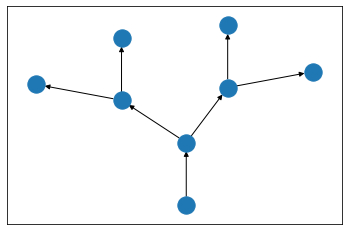

In [12]:
# Flatten to 2D and plot
G = Gs[2]
G_2D = G.copy() # deep copy
for v in G.nodes():
    G_2D.nodes[v]['pos'] = G.nodes[v]['pos'][0:2]
pos=nx.get_node_attributes(G_2D,'pos')
nx.draw_networkx(G_2D, pos, with_labels=False)

